<a href="https://colab.research.google.com/github/junaid786-prog/spam-review-detection/blob/main/spam_review_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam Review Detection**

## 1. Installing required libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

##2. Loading Dataset

In [52]:
from google.colab import drive

In [53]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
data_path = '/content/drive/MyDrive/data/spam-reviews.csv'
df = pd.read_csv(data_path, on_bad_lines="skip")
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


##3. Cleaning Data

In [55]:
description = df.describe()
# df.info()
# converting int columns like product_price and rating from datatype obj to int and then removing non-numeric values

df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')


# handling null values
null_rows_sum = df.isnull().sum()
null_rows = df[df['Review'].isnull()]

'''
As all other columns except reviews are not null. Dataset contains 205052 rows and review column is in text
also have important so we can drop it
Same for column Summary and other
'''

df.dropna(subset=['Review', 'Summary', 'Rate', 'product_price'], inplace=True)
df.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

##4. Analyzing & Visualizing Data

There are two main types of columns here. Product prices and Rates are numerical values and others are strings
So for numerical we are going to plot histograph
And for string

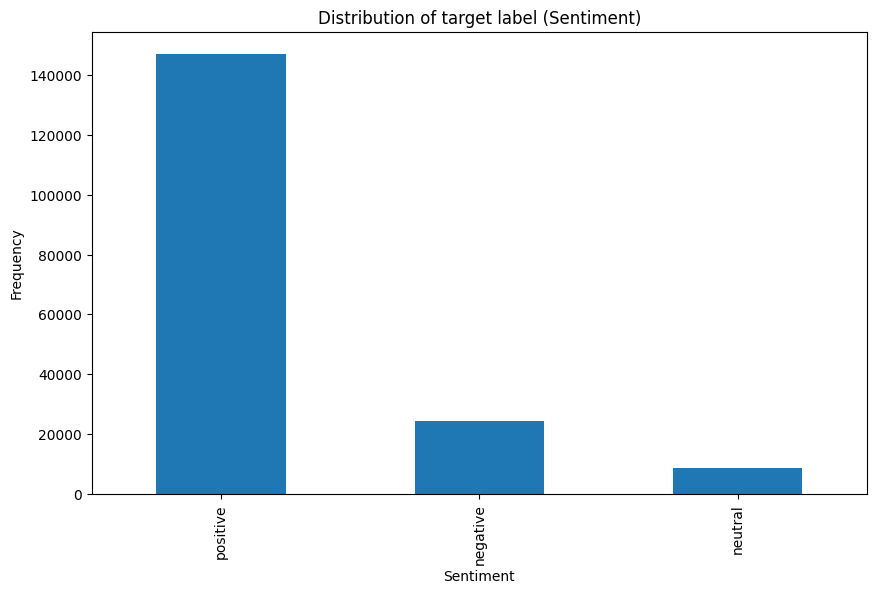

In [56]:
# For target variable sentiment
label_counts = df['Sentiment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of target label (Sentiment)')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

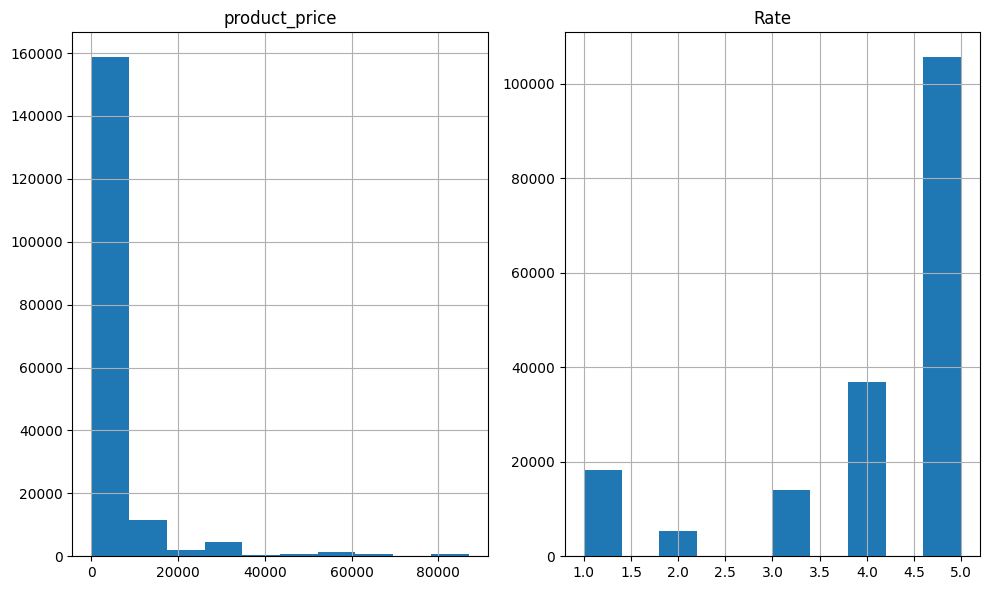

In [57]:
# Plot a histogram of numerical columns
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

<ipython-input-58-8cebe8d282fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


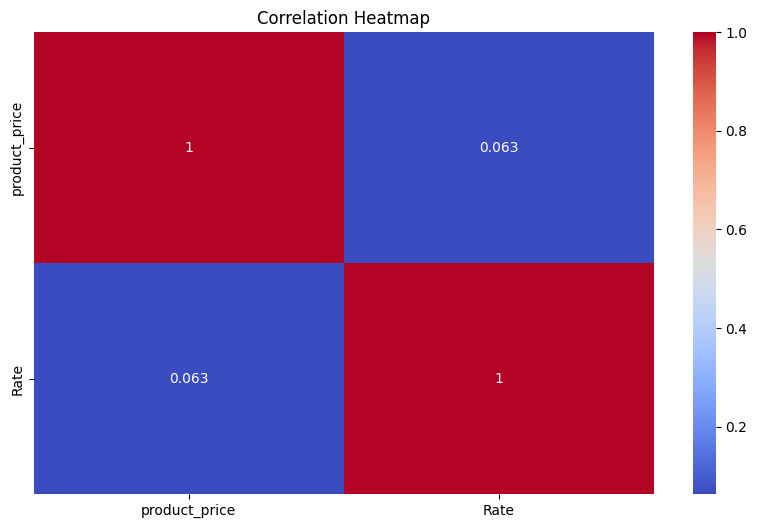

In [58]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [59]:
# nltk.download('punkt')

# # Tokenize the 'review' column
# df['review_tokens'] = df['Review'].apply(nltk.word_tokenize)

# # Tokenize the 'summary' column
# df['summary_tokens'] = df['Summary'].apply(nltk.word_tokenize)

# # Print the tokenized columns
# print(df[['review_tokens', 'summary_tokens']])

## 5. Tokenization of text columns
As in reviews and summary like columns there are text values so for further working we have to convert into numerical values (tokenization)

In [60]:
# converting target categorized variable to number 1 for positive, neutral and 0 for negative
df['Sentiment'] = df['Sentiment'].replace({'positive': 1, 'neutral': 1, 'negative': 0})

##6.Splitting dataset

In [61]:
df_to_pass = df[['Summary', 'product_price', 'Rate']]

X_train, X_test, Y_train, Y_test = train_test_split(df_to_pass, df["Sentiment"], test_size = 0.2, random_state=42)

###converting into numerics

In [62]:
# Considering only Summary as totaly sentiment is based on this column
text_data_train = X_train['Summary']
text_data_test = X_test['Summary']


# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(text_data_train)
X_test_tfidf = vectorizer.transform(text_data_test)

# Print the shape and example values of X_train_tfidf
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)
print("Example values of X_train_tfidf:")
# print(X_train_tfidf.toarray()[:3])  # Print the TF-IDF values of the first three samples

# print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
# vectorizer.get_feature_names_out()

Shape of X_train_tfidf: (144300, 39990)
Shape of X_test_tfidf: (36076, 39990)
Example values of X_train_tfidf:


## 7. Training & Testing Models
##### Four Steps We will be taking in each algorithm
###### 1. Importing that Classifier and initiaizing it
###### 2. Training model on above selected train data
###### 3. Making Predictions using above selected test data
###### 4. At end we will calculate accuracy of each model and at last will see whose accuracy is best

### 1. Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression classifier
L_classifier = LogisticRegression(max_iter=100000000)

# Fit the model to the training data
L_classifier.fit(X_train_tfidf, Y_train)

# Making predictions on test data
predictions = L_classifier.predict(X_test_tfidf)

# Accuracy Score
a = accuracy_score(Y_test, predictions)
print("Accuracy:", a)

Accuracy: 0.9540969065306575


###2. Support Vector Machine

In [15]:
#from sklearn.svm import SVC
#svc_classifier = SVC()
#svc_classifier.fit(X_train_tfidf, Y_train)
#predictions = svc_classifier.predict(X_test_tfidf)

## Print the predictions
#print("Predictions:", predictions)

###3. Naive Buyes

In [16]:
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier
naive_classifier = MultinomialNB()

# Fit the model to the training data
naive_classifier.fit(X_train_tfidf, Y_train)

# Making predictions on test data
predictions = naive_classifier.predict(X_test_tfidf)

# Calculating Accuracy Score
naive_bayes_accuracy = accuracy_score(Y_test, predictions)

print("Accuracy:", naive_bayes_accuracy)

Accuracy: 0.9048120634216654


###4. K Nearest Neighbours (KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_classifier.fit(X_train_tfidf, Y_train)

# Making predictions on test data
predictions = knn_classifier.predict(X_test_tfidf)

# Calculating Accuracy Score
knn_accuracy = accuracy_score(Y_test, predictions)

print("Accuracy:", knn_accuracy)

Accuracy: 0.9229958975496175


### 5. Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree classifier
decision_classifier = DecisionTreeClassifier()

# Fit the model to the training data
decision_classifier.fit(X_train_tfidf, Y_train)

# Making predictions on test data
predictions = decision_classifier.predict(X_test_tfidf)

# Calculating Accuracy Score
decision_tree_accuracy = accuracy_score(Y_test, predictions)

print("Accuracy:", decision_tree_accuracy)

Accuracy: 0.9514635768932254


## 8. Predicting Fake Or Not

In [64]:
def make_prediction(user_input, classifier):
  # Convert the sample text data to numerical features using TF-ID
  sample_tfidf = vectorizer.transform([user_input])
  # Make a prediction on the sample
  prediction = classifier.predict(sample_tfidf)
  # Print the predicted label
  if (prediction[0] == 0):
    print("this review is marked as negative")
  else:
    print("this review is marked as positive")

In [65]:
make_prediction("very bad product", L_classifier)

this review is marked as negative


In [35]:
def better_prediction (review):
  if naive_bayes_accuracy > knn_accuracy:
    if naive_bayes_accuracy >= decision_tree_accuracy:
      make_prediction(review, naive_classifier)
    elif naive_bayes_accuracy < decision_tree_accuracy:
      make_prediction(review, decision_tree_accuracy)
  elif naive_bayes_accuracy < knn_accuracy:
    if knn_accuracy >= decision_tree_accuracy:
      make_prediction(review, knn_accuracy)
    elif knn_accuracy < decision_tree_accuracy:
      make_prediction(review, decision_classifier)
better_prediction("pakistan is about to destroy due to economical crisis")

this review is marked as positive
